In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.models import resnet34
from torch.utils.data import random_split
from torch.utils.data import WeightedRandomSampler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import time
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pprint

In [4]:
h = {
    "num_epochs": 30,
    "batch_size": 256,
    "image_size": 224,
    "fc1_size": 512,
    "lr": 0.001,
    "model": "resnet34",
    "scheduler": "CosineAnnealingLR10",
    "balance": True,
    "early_stopping_patience": 10
}

Device: cpu
Number of CPU cores: 8
No GPU available
Hyperparameters:
{'balance': True,
 'batch_size': 256,
 'early_stopping_patience': 10,
 'fc1_size': 512,
 'image_size': 224,
 'lr': 0.001,
 'model': 'resnet34',
 'num_epochs': 30,
 'scheduler': 'CosineAnnealingLR10'}
Running solution 1/5


C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Омар/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [03:18<00:00, 440kB/s] 
C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:240: UserWarning: The epoch 

Epoch [1/30]: Train Loss: 0.3245, Val Loss: 0.1700, Remaining Time: 923m 3s


Epoch [2/30]: Train Loss: 0.0975, Val Loss: 0.3725, Remaining Time: 713m 1s


Epoch [3/30]: Train Loss: 0.0683, Val Loss: 0.1171, Remaining Time: 627m 56s


Epoch [4/30]: Train Loss: 0.0555, Val Loss: 0.1031, Remaining Time: 575m 46s


Epoch [5/30]: Train Loss: 0.0601, Val Loss: 0.1299, Remaining Time: 535m 26s


Epoch [6/30]: Train Loss: 0.0454, Val Loss: 0.0678, Remaining Time: 503m 40s


Epoch [7/30]: Train Loss: 0.0620, Val Loss: 0.0692, Remaining Time: 472m 9s


Epoch [8/30]: Train Loss: 0.0419, Val Loss: 0.0950, Remaining Time: 446m 21s


Epoch [9/30]: Train Loss: 0.0444, Val Loss: 0.2252, Remaining Time: 423m 56s


Epoch [10/30]: Train Loss: 0.0309, Val Loss: 0.5957, Remaining Time: 405m 16s


Epoch [11/30]: Train Loss: 0.0366, Val Loss: 0.0713, Remaining Time: 384m 16s


Epoch [12/30]: Train Loss: 0.0386, Val Loss: 0.0677, Remaining Time: 361m 54s


Epoch [13/30]: Train Loss: 0.0312, Val Loss: 0.0738, Remaining Time: 339m 38s


Epoch [14/30]: Train Loss: 0.0331, Val Loss: 0.0569, Remaining Time: 318m 21s


Epoch [15/30]: Train Loss: 0.0340, Val Loss: 0.0554, Remaining Time: 297m 22s


Epoch [16/30]: Train Loss: 0.0203, Val Loss: 0.0567, Remaining Time: 276m 15s


Epoch [17/30]: Train Loss: 0.0355, Val Loss: 0.0922, Remaining Time: 255m 23s


Epoch [18/30]: Train Loss: 0.0294, Val Loss: 0.0714, Remaining Time: 235m 9s


Epoch [19/30]: Train Loss: 0.0210, Val Loss: 0.1174, Remaining Time: 214m 43s


Epoch [20/30]: Train Loss: 0.0309, Val Loss: 0.2181, Remaining Time: 194m 40s


Epoch [21/30]: Train Loss: 0.0387, Val Loss: 0.0900, Remaining Time: 174m 43s


Epoch [22/30]: Train Loss: 0.0304, Val Loss: 0.0548, Remaining Time: 154m 55s


Epoch [23/30]: Train Loss: 0.0243, Val Loss: 0.0977, Remaining Time: 135m 13s


Epoch [24/30]: Train Loss: 0.0155, Val Loss: 0.0516, Remaining Time: 115m 33s


Epoch [25/30]: Train Loss: 0.0138, Val Loss: 0.0598, Remaining Time: 96m 7s


Epoch [26/30]: Train Loss: 0.0268, Val Loss: 0.0731, Remaining Time: 76m 52s


Epoch [27/30]: Train Loss: 0.0288, Val Loss: 0.1349, Remaining Time: 57m 32s


Epoch [28/30]: Train Loss: 0.0108, Val Loss: 0.0526, Remaining Time: 38m 19s


Epoch [29/30]: Train Loss: 0.0140, Val Loss: 0.0767, Remaining Time: 19m 7s


Epoch [30/30]: Train Loss: 0.0195, Val Loss: 0.0800, Remaining Time: 0m 0s


C:\Users\Омар\AppData\Local\Temp\ipykernel_13532\512052923.py:166: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_weights.pth'))


Accuracy on the test set: 87.50%
Precision: 0.83, Recall: 1.00, F1 score: 0.91


<Figure size 640x480 with 0 Axes>

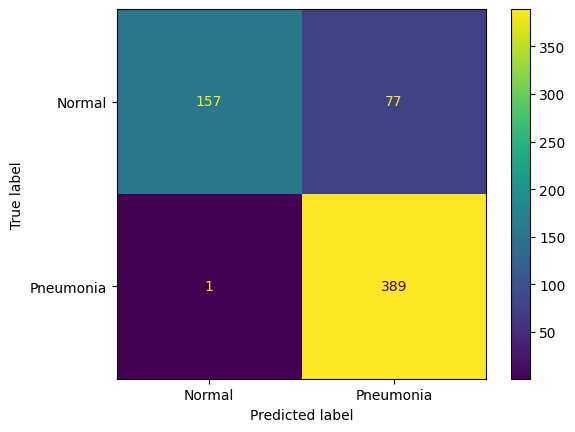

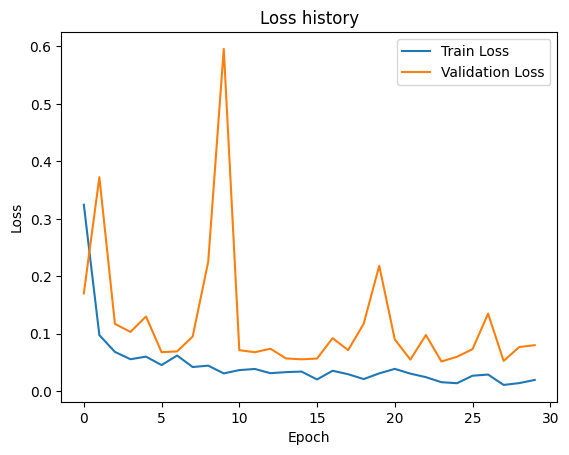

F1 = 0.91, accuracy = 0.88 
Running solution 2/5


C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from 

Epoch [1/30]: Train Loss: 0.3083, Val Loss: 0.6845, Remaining Time: 514m 6s


Epoch [2/30]: Train Loss: 0.0802, Val Loss: 0.2872, Remaining Time: 496m 54s


Epoch [3/30]: Train Loss: 0.0629, Val Loss: 0.0736, Remaining Time: 479m 55s


Epoch [4/30]: Train Loss: 0.0589, Val Loss: 0.0396, Remaining Time: 464m 1s


Epoch [5/30]: Train Loss: 0.0530, Val Loss: 0.0874, Remaining Time: 448m 3s


Epoch [6/30]: Train Loss: 0.0472, Val Loss: 0.0360, Remaining Time: 430m 37s


Epoch [7/30]: Train Loss: 0.0591, Val Loss: 0.1941, Remaining Time: 413m 32s


Epoch [8/30]: Train Loss: 0.0352, Val Loss: 0.0522, Remaining Time: 397m 14s


Epoch [9/30]: Train Loss: 0.0522, Val Loss: 0.0425, Remaining Time: 379m 4s


Epoch [10/30]: Train Loss: 0.0507, Val Loss: 0.1222, Remaining Time: 360m 57s


Epoch [11/30]: Train Loss: 0.0358, Val Loss: 0.0476, Remaining Time: 342m 17s


Epoch [12/30]: Train Loss: 0.0288, Val Loss: 0.0660, Remaining Time: 324m 4s


Epoch [13/30]: Train Loss: 0.0333, Val Loss: 0.0454, Remaining Time: 305m 60s


Epoch [14/30]: Train Loss: 0.0268, Val Loss: 0.2569, Remaining Time: 288m 1s


Epoch [15/30]: Train Loss: 0.0346, Val Loss: 0.1588, Remaining Time: 270m 9s


Early stopping at epoch 16.


C:\Users\Омар\AppData\Local\Temp\ipykernel_13532\512052923.py:166: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_weights.pth'))


F1 = 0.87, accuracy = 0.81 
Running solution 3/5


C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Омар\PycharmProjects\FinalMLProject\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from 

Epoch [1/30]: Train Loss: 0.3013, Val Loss: 9.6808, Remaining Time: 527m 44s


Epoch [2/30]: Train Loss: 0.0973, Val Loss: 0.1170, Remaining Time: 507m 51s


Epoch [3/30]: Train Loss: 0.0629, Val Loss: 0.8054, Remaining Time: 490m 43s


Epoch [4/30]: Train Loss: 0.0729, Val Loss: 0.1041, Remaining Time: 473m 13s


Epoch [5/30]: Train Loss: 0.0634, Val Loss: 0.0507, Remaining Time: 455m 58s


Epoch [6/30]: Train Loss: 0.0438, Val Loss: 0.0714, Remaining Time: 436m 54s


Epoch [7/30]: Train Loss: 0.0370, Val Loss: 0.0894, Remaining Time: 418m 44s


Epoch [8/30]: Train Loss: 0.0352, Val Loss: 0.0877, Remaining Time: 402m 41s


Epoch [9/30]: Train Loss: 0.0442, Val Loss: 1.0926, Remaining Time: 387m 33s


Epoch [10/30]: Train Loss: 0.0391, Val Loss: 0.2017, Remaining Time: 374m 25s


Epoch [11/30]: Train Loss: 0.0237, Val Loss: 0.0380, Remaining Time: 359m 27s


Epoch [12/30]: Train Loss: 0.0346, Val Loss: 0.1036, Remaining Time: 343m 6s


Epoch [13/30]: Train Loss: 0.0426, Val Loss: 0.1667, Remaining Time: 324m 20s


Epoch [14/30]: Train Loss: 0.0266, Val Loss: 0.0877, Remaining Time: 304m 33s


Epoch [15/30]: Train Loss: 0.0165, Val Loss: 0.0846, Remaining Time: 286m 38s


Training epoch 16/30:   6%|▌         | 1/17 [02:02<32:34, 122.18s/mini-batch, loss=0.0131]

In [ ]:
def extract_patient_ids(filename):
    patient_id = filename.split('_')[0].replace("person", "")
    return patient_id

def split_file_names(input_folder, val_split_perc):
    pneumonia_patient_ids = set([extract_patient_ids(fn) for fn in os.listdir(os.path.join(input_folder, 'PNEUMONIA'))])
    pneumonia_val_patient_ids = random.sample(list(pneumonia_patient_ids), int(val_split_perc * len(pneumonia_patient_ids)))

    pneumonia_val_filenames = []
    pneumonia_train_filenames = []

    for filename in os.listdir(os.path.join(input_folder, 'PNEUMONIA')):
        patient_id = extract_patient_ids(filename)
        if patient_id in pneumonia_val_patient_ids:
            pneumonia_val_filenames.append(os.path.join(input_folder, 'PNEUMONIA', filename))
        else:
            pneumonia_train_filenames.append(os.path.join(input_folder, 'PNEUMONIA', filename))

    normal_filenames  = [os.path.join(input_folder, 'NORMAL', fn) for fn in os.listdir(os.path.join(input_folder, 'NORMAL'))]
    normal_val_filenames = random.sample(normal_filenames, int(val_split_perc * len(normal_filenames)))
    normal_train_filenames = list(set(normal_filenames)-set(normal_val_filenames))

    train_filenames = pneumonia_train_filenames + normal_train_filenames
    val_filenames = pneumonia_val_filenames + normal_val_filenames

    return train_filenames, val_filenames

def create_weighted_sampler(h, dataset):
    targets = [label for _, label in dataset]
    class_counts = np.bincount(targets)
    class_weights = 1.0 / class_counts
    weights = [class_weights[label] for label in targets]
    sampler = WeightedRandomSampler(weights, len(weights))
    return sampler

def prepare_data(h):
    data_transforms = transforms.Compose([
        transforms.Resize(size=(h["image_size"], h["image_size"])),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

    data_transforms_train = transforms.Compose([
        transforms.RandomRotation(20),  # Randomly rotate the image within a range of (-20, 20) degrees
        transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally with 50% probability
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Randomly change the brightness, contrast, saturation, and hue
        transforms.RandomApply([transforms.RandomAffine(0, translate=(0.1, 0.1))], p=0.5),  # Randomly apply affine transformations with translation
        transforms.RandomApply([transforms.RandomPerspective(distortion_scale=0.2)], p=0.5),  # Randomly apply perspective transformations
        transforms.Resize(size=(h["image_size"], h["image_size"])),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])
    # C:\Users\Омар\PycharmProjects\FinalMLProject\chest_xray\train
    val_split = 0.2
    train_filenames, val_filenames = split_file_names("C:\\Users\\Омар\\PycharmProjects\\FinalMLProject\\chest_xray\\train\\", val_split)

    train_dataset = datasets.ImageFolder("C:\\Users\\Омар\\PycharmProjects\\FinalMLProject\\chest_xray\\train\\", transform=data_transforms_train, is_valid_file=lambda x: x in train_filenames)
    val_dataset = datasets.ImageFolder("C:\\Users\\Омар\\PycharmProjects\\FinalMLProject\\chest_xray\\train\\", transform=data_transforms, is_valid_file=lambda x: x in val_filenames)    
    test_dataset = datasets.ImageFolder("C:\\Users\\Омар\\PycharmProjects\\FinalMLProject\\chest_xray\\test\\", transform=data_transforms)

    if (h["balance"]):
        sampler = create_weighted_sampler(h, train_dataset)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=h["batch_size"], sampler=sampler, num_workers=4)    
    else:
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=h["batch_size"], shuffle=True, num_workers=4)    
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=h["batch_size"], shuffle=True, num_workers=4)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=h["batch_size"], shuffle=True, num_workers=4)

    return train_loader, val_loader, test_loader

def create_model(h, device):
    if (h["model"]=="fc"):
        model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3 * h["image_size"] * h["image_size"], h["fc1_size"]),
            nn.ReLU(),
            nn.Linear(h["fc1_size"], 2)
        )
        model = model.to(device)
        return model
    if (h["model"]=="cnn"):
        model = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Dropout(0.25),
            nn.Linear(64 * (h["image_size"] // 8) * (h["image_size"] // 8), 512),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, 2)
        )
        model = model.to(device)
        return model
    if (h["model"]=="resnet34"):
        model = resnet34(pretrained=True)
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, 2)
        model = model.to(device)
        return model

def train_model(h, model, train_loader, val_loader, optimizer, criterion, scheduler, device):
    train_loss_history = []
    val_loss_history = []

    best_val_loss = float('inf')
    patience_counter = 0
    patience = h["early_stopping_patience"]  # The patience threshold for early stopping

    start_time = time.time()
    num_epochs = h["num_epochs"]

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        progress_bar = tqdm(train_loader, desc=f"Training epoch {epoch + 1}/{num_epochs}", leave=False, unit="mini-batch")
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)      
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())


        val_loss, _, _, _ = evaluate_model(h, model, val_loader, criterion, device)
        scheduler.step(val_loss)
        
        train_loss = running_loss / len(train_loader)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_weights.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}.")
            break        

        elapsed_time = time.time() - start_time
        avg_time_per_epoch = elapsed_time / (epoch + 1)
        remaining_epochs = num_epochs - (epoch + 1)
        remaining_time = avg_time_per_epoch * remaining_epochs

        remaining_time_min, remaining_time_sec = divmod(remaining_time, 60)

        print(f"Epoch [{epoch + 1}/{num_epochs}]: Train Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Remaining Time: {remaining_time_min:.0f}m {remaining_time_sec:.0f}s")

    if patience!=float("inf"):
        model.load_state_dict(torch.load('best_model_weights.pth'))

    return train_loss_history, val_loss_history

def evaluate_model(h, model, data_loader, criterion, device):
    true_labels = []
    predicted_labels = []
    total_loss = 0.0
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)          

            outputs = model(inputs)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    epoch_loss = total_loss / len(data_loader)
    epoch_accuracy = correct / total

    return epoch_loss, epoch_accuracy, true_labels, predicted_labels

def plot_metrics(h, train_loss_history, val_loss_history, test_loss, test_accuracy, true_labels, predicted_labels):
    print(f"Accuracy on the test set: {test_accuracy:.2%}")

    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 score: {f1:.2f}")

    cm = confusion_matrix(true_labels, predicted_labels)

    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia"])
    disp.plot()

    plt.figure()
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss history')
    plt.legend()
    plt.show()  

def create_scheduler(h, optimizer, lr):
    scheduler_name = h["scheduler"]
    if (scheduler_name==""):
        return None
    if (scheduler_name=="CosineAnnealingLR10"):
        return torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=h["num_epochs"], eta_min=lr*0.1)
    if (scheduler_name=="ReduceLROnPlateau5"):
        return torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
    print ("Error. Unknown scheduler name '{scheduler_name}'")
    return None

def check_solution(h, device, verbose):
    train_loader, val_loader, test_loader = prepare_data(h)
    model = create_model(h, device)
    optimizer = torch.optim.Adam(model.parameters(), lr=h["lr"])
    scheduler = create_scheduler(h, optimizer, h["lr"])
    criterion = nn.CrossEntropyLoss()
    train_loss_history, val_loss_history = train_model(h, model, train_loader, val_loader, optimizer, criterion, scheduler, device)
    test_loss, test_accuracy, true_labels, predicted_labels = evaluate_model(h, model, test_loader, criterion, device)
    if verbose:
        plot_metrics(h, train_loss_history, val_loss_history, test_loss, test_accuracy, true_labels, predicted_labels)

    f1 = f1_score(true_labels, predicted_labels)

    return f1, test_accuracy


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

num_cpu_cores = os.cpu_count()
print(f"Number of CPU cores: {num_cpu_cores}")

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU name: {gpu_name}")
else:
    print("No GPU available")

print("Hyperparameters:")
pprint.pprint(h)

f1_array = np.array([])
accuracy_array = np.array([])
start_time = time.time()

repeats = 5
for i in range(repeats):
    print(f"Running solution {i+1}/{repeats}")
    f1, accuracy = check_solution(h, device, verbose=(i==0))
    print(f"F1 = {f1:.2f}, accuracy = {accuracy:.2f} ")
    f1_array = np.append(f1_array, f1)
    accuracy_array = np.append(accuracy_array, accuracy) 

repeat_time = (time.time() - start_time) / repeats
repeat_time_min, repeat_time_sec = divmod(repeat_time, 60)

print("Results")
print(f"F1 List: {f1_array}")
print(f"Accuracy List: {accuracy_array}")
print(f"F1: {np.mean(f1_array):.1%} (+-{np.std(f1_array):.1%})")
print(f"Accuracy: {np.mean(accuracy_array):.1%} (+-{np.std(accuracy_array):.1%})")
print(f"Time of one solution: {repeat_time_min:.0f}m {repeat_time_sec:.0f}s")

print(f" | {np.mean(f1_array):.1%} (+-{np.std(f1_array):.1%}) | {np.mean(accuracy_array):.1%} (+-{np.std(accuracy_array):.1%}) | {repeat_time_min:.0f}m {repeat_time_sec:.0f}s")

print("Hyperparameters:")
pprint.pprint(h)